In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from utils import *
plt.rc('font', family="Arial")
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.size'] = '16'

Compute the loss values at saddle points, $\mathcal L(\mathcal M_m)$

In [6]:
def loss_at_saddle(D=4, N=31):
    Lambda = np.arange(D)[::-1]+1
    Lambda = Lambda / np.sum(Lambda)
    Tr = np.sum(Lambda)
    loss = Tr
    saddle = np.zeros(len(Lambda)+1)
    for d in range(len(Lambda)):
        saddle[d] = loss
        loss = loss - Lambda[d] / (1 + (1+Tr/Lambda[d])/N)
    saddle[-1] = loss
    return saddle

The loss curves of $\mathsf{attn_M}(X)$ and $\mathsf{MLP}(z)$ overlap

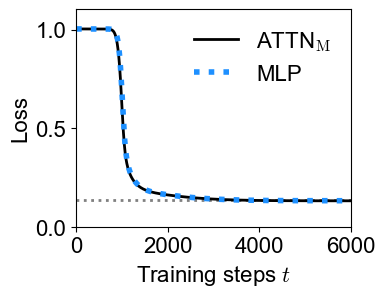

In [3]:
attn = np.loadtxt('attn_KQ_head8_P5000_N32_seed10.txt')
mlp = np.loadtxt('mlp_head8_P5000_N32_seed10.txt')
Ls_min = loss_at_saddle()[-1]

plt.figure(figsize=(4, 3))
plt.hlines(y=Ls_min, xmin=[0], xmax=[len(attn)], colors='gray', linestyles='dotted', lw=2)
plt.plot(attn, c='k', lw=2, label=r'ATTN$_{\mathrm{M}}$')
plt.plot(mlp, c='dodgerblue', lw=4, linestyle='dotted', label=r'MLP')
plt.xlabel(r'Training steps $t$')
plt.ylabel('Loss')
plt.xlim([0, len(mlp)])
plt.ylim([0, np.max(mlp)+0.1])
plt.legend(frameon=False)
plt.tight_layout(pad=0.5)
plt.savefig('attn_mlp_loss.pdf')

The loss curves of $\mathsf{attn_S}(X)$ with several different random seeds

[1.         0.64057971 0.37737216 0.2098046  0.13599507]


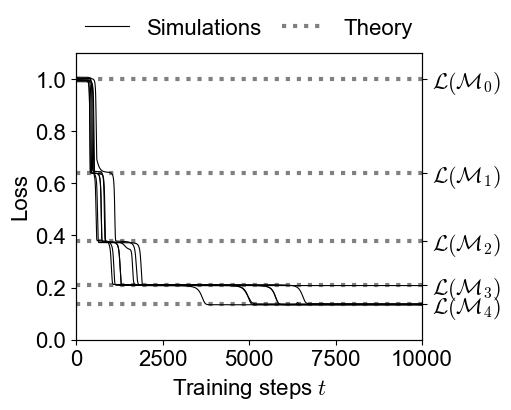

In [8]:
D = 4
saddle = loss_at_saddle(D)
print(saddle)

filename = 'attn_head5_KQdim1_P80000_N32_seed'
seeds = np.arange(6)

Ls = np.loadtxt(f'attnS/{filename}{seeds[0]}.txt')
plt.figure(figsize=(5,4))
plt.plot(Ls, c='k', lw=0.8, label='Simulations')
plt.hlines(y=saddle, xmin=np.zeros(len(saddle)), xmax=[len(Ls)], colors='gray', lw=3, linestyles='dotted', label='Theory')
for s in seeds:
    Ls = np.loadtxt(f'attnS/{filename}{s}.txt')
    plt.plot(Ls, c='k', lw=0.8)

plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=2, frameon=False)
plt.gca().set_xlim([0, len(Ls)])
plt.gca().set_ylim([0, 1.1])
plt.gca().set_yticks([0,0.5,1])
plt.gca().set_xlabel(r'Training steps $t$')
plt.gca().set_ylabel('Loss')
if D == 4:
    plt.gca().set_yticks(np.arange(0,1.2,0.2))
    ax_right = plt.gca().twinx()
    ax_right.set_yticks(saddle)
    ax_right.set_yticklabels([r'$\mathcal{L} (\mathcal{M}_0)$', \
                            r'$\mathcal{L} (\mathcal{M}_1)$', \
                            r'$\mathcal{L} (\mathcal{M}_2)$', \
                            r'$\mathcal{L} (\mathcal{M}_3)$', \
                            r'$\mathcal{L} (\mathcal{M}_4)$'])
    ax_right.set_ylim([0, 1.1])
plt.tight_layout(pad=0.2)
plt.savefig(f'{filename}.pdf')

In-context and in-weight learning loss curves

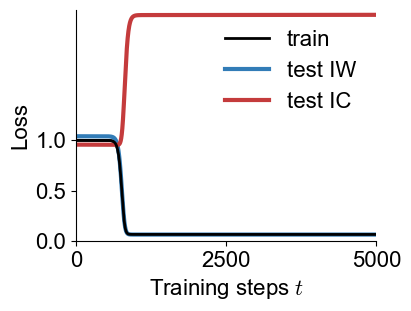

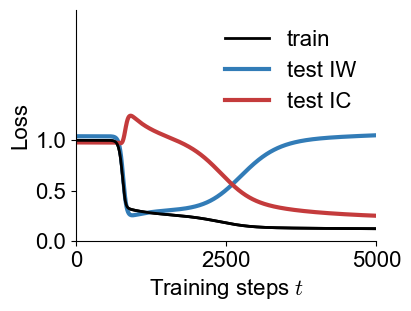

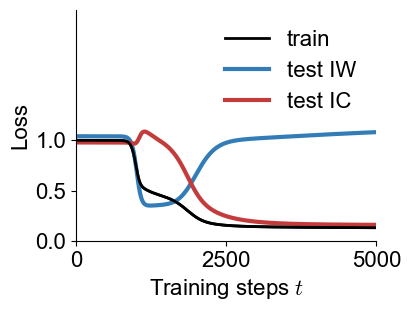

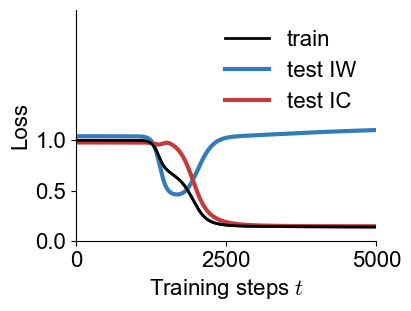

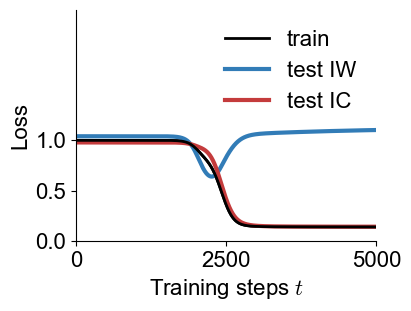

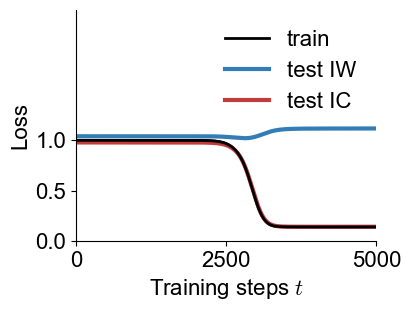

In [ ]:
for p in [0.0,0.2,0.4,0.6,0.8,1.0]:
    results = np.loadtxt(f'icl_iwl/attnM_head8_D4_P5000_N32_icl{p}.txt')
    Ls, Eg_iwl, Eg_icl = results[:,0], results[:,1], results[:,2]

    cmap = matplotlib.colormaps['RdBu']
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.figure(figsize=(4, 3))
    plt.plot(Ls/Ls[0], c='k', lw=2, label='train')
    plt.plot(Eg_iwl, c=cmap(0.85), lw=3, label='test IW')
    plt.plot(Eg_icl, c=cmap(0.15), lw=3, label='test IC')
    plt.plot(Ls/Ls[0], c='k', lw=2)  # let loss be on the top layer but its label go first
    plt.xlim([0, 5000])
    plt.xticks([0,2500,5000])
    plt.ylim([0, 2.3])
    plt.yticks([0,0.5,1])
    plt.xlabel(r'Training steps $t$')
    plt.ylabel('Loss')
    plt.legend(frameon=False)
    plt.tight_layout(pad=0.2)
    plt.savefig(f'icl_iwl/attnM_head8_D4_P5000_N32_icl{p}.pdf')